In [ ]:
Build a random forest classifier to predict the risk of heart disease based on a dataset of patient 
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, 
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

In [ ]:
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("dataset.csv")
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [ ]:
Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the 
numerical features if necessary.

In [2]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
X=df.drop(labels=['target'],axis=1)
y=df['target']

In [ ]:
Q2. Split the dataset into a training set (70%) and a test set (30%).

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each 
tree. Use the default values for other hyperparameters.

In [13]:
from sklearn.impute import SimpleImputer ## Handling Missing Values
from sklearn.preprocessing import OneHotEncoder## handling Categorical features
from sklearn.preprocessing import StandardScaler## Feature scaling
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
## Automating the entire

In [14]:
categorical_cols = []
numerical_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [15]:
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')), ##missing values
        ('scaler',StandardScaler())## feature scaling 
    ]

)

In [16]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
])

In [17]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
## Automate Model Training Process
models={
    'Random Forest':RandomForestClassifier(n_estimators=100,max_depth=10)

}

In [ ]:
Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)

            

        # Predict Testing data
        y_test_pred =model.predict(X_test)

        # Get accuracy for test data prediction
       
        test_model_score = accuracy_score(y_test,y_test_pred)

        report[list(models.keys())[i]] =  test_model_score
            

            
    return report

In [24]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest': 0.8021978021978022}

In [ ]:
Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart 
disease risk. Visualise the feature importances using a bar chart.

In [27]:
rf=RandomForestClassifier(n_estimators=100,max_depth=10)
rf.fit(X_train,y_train)
y_test_pred1=rf.predict(X_test)
test_score = accuracy_score(y_test,y_test_pred1)
test_score

0.8021978021978022

In [28]:
rf.feature_importances_

array([0.08241794, 0.02834598, 0.10649978, 0.07166535, 0.07442928,
       0.0118283 , 0.01917793, 0.11816692, 0.06116013, 0.10175449,
       0.05727039, 0.13408888, 0.13319464])

In [35]:
re_features=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\aareb\AppData\Local\Temp\ipykernel_24032\2666981268.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',


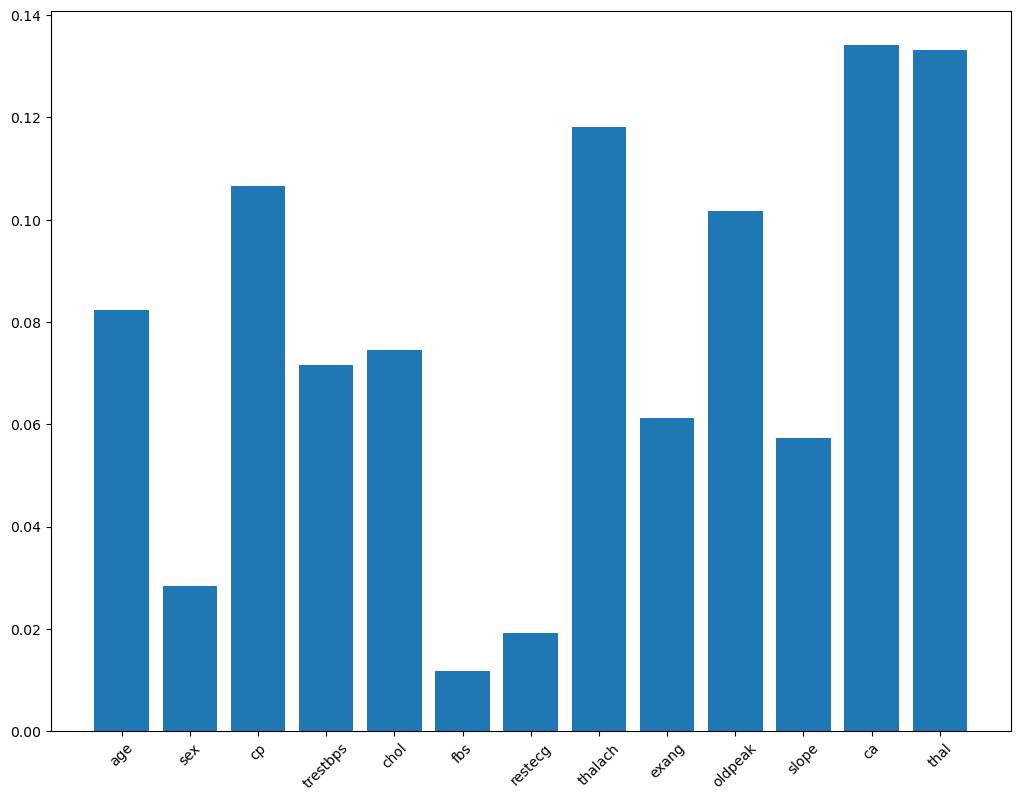

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(re_features,rf.feature_importances_)
ax.set_xticklabels(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], rotation=45)
plt.show()

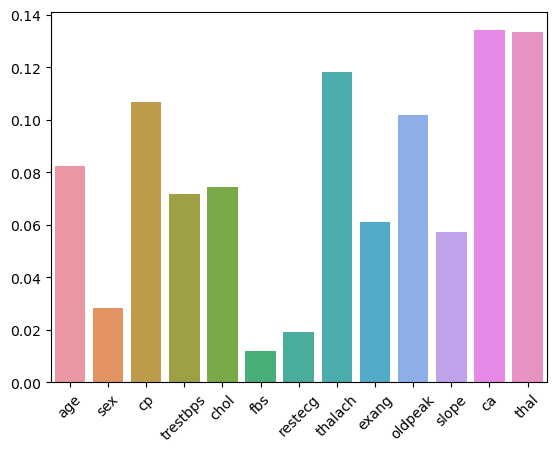

In [50]:
sns.barplot(x=re_features,y=rf.feature_importances_)
plt.xticks(rotation=45)
plt.show()

## top 5 important feature score features are ca,thal, thalach,cp and oldpeak as order

In [ ]:
Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try 
different values of the number of trees, maximum depth, minimum samples split, and minimum samples 
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
classifier=RandomForestClassifier()

In [53]:
## Hypeparameter Tuning
params={'max_depth':[3,5,10,20],
              'n_estimators':[100,200,300],
               'criterion':['gini','entropy'],
               'min_samples_split':[2,3],
                'min_samples_leaf':[1,2]
              }

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
cv=RandomizedSearchCV(classifier,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.884 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.837 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.714 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.905 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.762 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=0.884 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=0.860 total time=   0.4s
[C

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [56]:
cv.best_params_

{'n_estimators': 300,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'criterion': 'entropy'}

In [ ]:
Q7. Report the best set of hyperparameters found by the search and the corresponding performance 
metrics. Compare the performance of the tuned model with the default model.

In [57]:
classifier1=RandomForestClassifier(n_estimators= 200,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_depth= 20,
 criterion= 'gini')

classifier1.fit(X_train,y_train)
y_test_pred=classifier1.predict(X_test)
classifier1_score = accuracy_score(y_test,y_test_pred)
classifier1_score

0.8241758241758241

-- Performance of tuned model is 83.5% greater than default model performance of 82.47

In [ ]:
Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the 
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and 
limitations of the model for predicting heart disease risk.

### ca,thal are 2 most impoerant features

In [70]:
df1=df[["ca","thal"]]

In [71]:
df1

,ca,thal
0,0,1
1,0,2
2,0,2
3,0,2
4,0,2
...,...,...
298,0,3
299,0,3
300,2,3
301,1,3


Text(0, 0.5, 'thal')

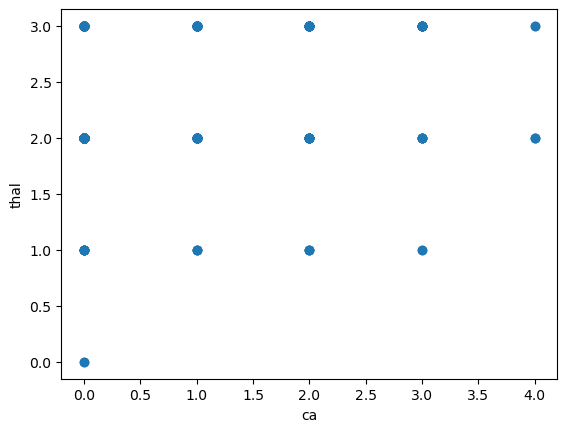

In [74]:
plt.scatter(df1["ca"],df["thal"])
plt.xlabel("ca")
plt.ylabel("thal")